<a href="https://colab.research.google.com/github/exopas95/data-science-from-scratch/blob/master/2_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 시각화
데이터 시각화는 데이터 과학자가 갖춰야할 가장 기본적인 기술 중 하나로 다음 두 가지 목적 달성을 목표로 한다.

*   데이터 탐색(exploration)
*   데이터 전달(communication)





## 1. matplotlib
데이터 시각화를 위해 가장 널리 알려진 matplotlib를 사용해보자. 복잡한 시각화에는 적합하지 않을지 모르지만, 간단한 막대 그래프, 선 그래프, 또는 산점도를 그릴 때는 매우 편리하다. 먼저 matplotlib 라이브러리를 설치하고 간단한 선 그래프를 만들어보자.

In [1]:
# 패키지 인스톨
!python -m pip install matplotlib

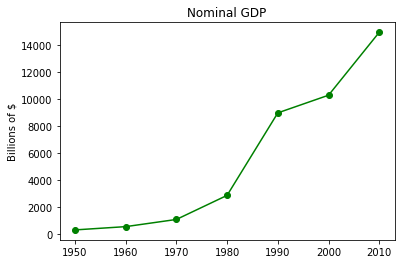

In [25]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 8979.6, 10289.7, 14958.3]

# x축에 연도, y축에 GDP가 있는 선 그래프를 만들자
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# 제목을 더하자
plt.title("Nominal GDP")

# y축에 레이블을 추가하자
plt.ylabel("Billions of $")
plt.show()

## 2. 막대그래프
막대 그래프는 이산적인(discrete) 항목들에 대한 변화를 보여줄 때 사용된다. 

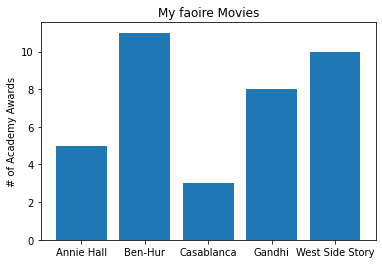

In [5]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# 막대의 x 좌표는 [0, 1, 2, 3, 4,],y 좌표는 [num_oscars]로 설정
plt.bar(range(len(movies)), num_oscars)
plt.title("My faoire Movies")
plt.ylabel("# of Academy Awards")

# x축 각 막대의 중앙에 영화 제목을 레이블로 추가하자.
plt.xticks(range(len(movies)), movies)
plt.show()

막대 그래프와 유사한 방법으로 히스토그램을 그릴 수 있다. 히스토 그램은 정해진 구간에 해당되는 항목의 개수를 보여줌으로써 값의 **분포**를 관찰할 수 있는 그래프 형태이다. 여기서 **plt.axis**를 사용하는데 신중해야 한다. y축의 시작이 0에서 시작하지 않는 경우가 많기 때문에 꼭 **plt.axis**를 통해서 범위를 정해주자.

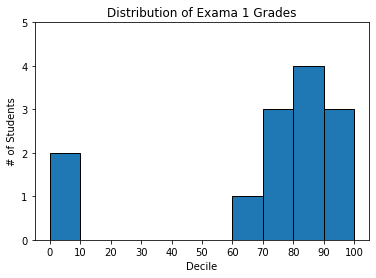

In [9]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# 점수는 10점 단위로 그룹화한다. 100점은 90점대에 속한다.
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
# x를 5만큼 움직이고, 높이를 정하고, 너비는 10으로 하고, 각 막대의 테두리는 검은색으로 설정
plt.bar([x + 5 for x in histogram.keys()], histogram.values(), 10, edgecolor=(0, 0, 0))
# x축은 -5~105, y축은 0~5
plt.axis([-5, 105, 0, 5])

plt.xticks([10 * i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exama 1 Grades")
plt.show()

## 3. 선 그래프
matplotlib 소개에서 나타냈듯이, 선 그래프는 어떤 경향을 보여줄 때 유용하다.

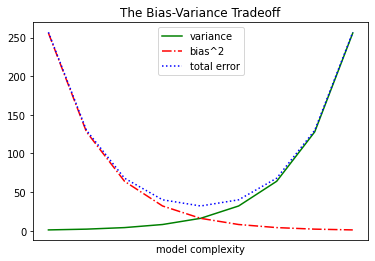

In [22]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# 한 차트에 여러 개의 선을 그리기 위해 plt.plot을 여러번 호출할 수 있다.
plt.plot(xs, variance, 'g-', label="variance")        # 실선
plt.plot(xs, bias_squared, 'r-.', label='bias^2')         # 일점쇄선
plt.plot(xs, total_error, 'b:', label='total error')  # 점선

# 각 선에 레이블을 미리 달아 놨기 때문에 범례(legend)를 쉽게 그릴 수 있다
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## 4. 산점도
산점도는 두 변수 간의 연관 관계를 보여 주고 싶을 때 적합한 그래프이다. 

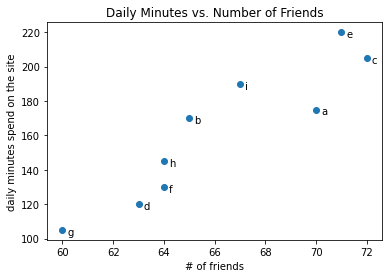

In [24]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# 각 포인터에 레이블을 달자.
for label, friend_count, minute_count in zip(labels, friends, minutes):
  plt.annotate(label, xy=(friend_count, minute_count), xytext=(5, -5), textcoords="offset points")

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spend on the site")
plt.show()